In [ ]:
from sklearn.datasets import fetch_covtype
import pandas as pd


cov_type = fetch_covtype()

print(cov_type.DESCR)


.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional argument 'as_frame' is
se

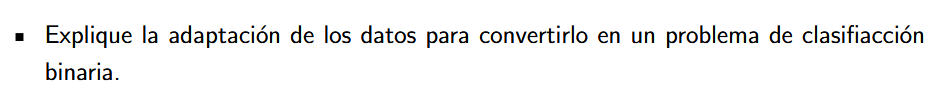

Para convertirlo en un problema de clasificacion binaria, la unica adaptacion que hay que hacer a los datos es cambiar las etiquetas de los mismos, dejando solamente 2 clases. En este caso hay 7 clases en cov_type.target, por lo que una adaptacion que deja solamente la clase 2 es:

(cov_type.target == 2).astype(int)

en donde se deja la clase 2 cambiandola por la nueva clase positiva(1), y el resto de clases que son distintas de 2 por negativa (0).

In [ ]:


X = pd.DataFrame(cov_type.data, columns=cov_type.feature_names)
y = pd.Series(cov_type.target, name="Cover_Type") #Acá le paso las clases convertidas a binarias

# Filtrar clases 1, 2, 3 y 4

mask = y.isin([1, 2, 3, 4])

X = X[mask]
y = y[mask]

# transformo en clases binariass, dejando clase 2 como 1, y cualquier otra como 0

y = (y == 2).astype(int)


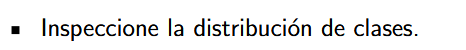

In [ ]:
y.value_counts()

,count
Cover_Type,
1,283301
0,250341


Vemos que hay casi la misma cantidad de ejemplos para cada clase (no seria asi si no hubieramos convertido el problema en uno de clasificacion binaria).

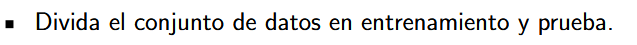

In [ ]:
X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,...,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.000000,533642.0,533642.000000,533642.000000,533642.000000
mean,2964.531855,155.231339,13.891774,270.644001,45.490119,2395.755979,212.387365,223.894407,142.999485,2014.105027,...,0.046983,0.095607,0.081442,0.002858,0.001767,0.000105,0.0,0.017744,0.015441,0.009666
std,259.437306,111.395665,7.395640,209.806734,57.461152,1574.774604,26.416651,19.313216,37.619132,1342.793353,...,0.211602,0.294052,0.273513,0.053381,0.042000,0.010243,0.0,0.132020,0.123299,0.097838
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2831.000000,58.000000,8.000000,108.000000,7.000000,1129.000000,199.000000,214.000000,120.000000,1050.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2047.000000,218.000000,226.000000,143.000000,1742.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,3153.000000,258.000000,18.000000,390.000000,67.000000,3388.000000,231.000000,238.000000,168.000000,2580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,3686.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#estandarizo los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)


In [ ]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
506692,1.798001,-0.989549,-1.337516,0.835799,0.983446,-0.76694,0.326031,0.316136,0.053178,1.446907,...,-0.222034,-0.325137,-0.297764,-0.053534,23.767587,-0.010245,0.0,-0.134405,-0.125233,-0.098793
399763,1.262226,-0.397066,-0.796656,0.478326,-0.147754,-0.79615,0.818145,0.367914,-0.372138,-0.088700,...,-0.222034,-0.325137,-0.297764,-0.053534,-0.042074,-0.010245,0.0,-0.134405,-0.125233,-0.098793
399041,-0.345100,0.455751,-0.931871,-0.884834,-0.722056,-0.50468,0.136756,1.196363,0.611405,0.396111,...,-0.222034,-0.325137,3.358369,-0.053534,-0.042074,-0.010245,0.0,-0.134405,-0.125233,-0.098793
92370,-0.067577,-0.765123,-0.255796,-0.651286,-0.617637,1.03459,0.780290,-0.356979,-0.770871,-0.090934,...,-0.222034,-0.325137,-0.297764,-0.053534,-0.042074,-0.010245,0.0,-0.134405,-0.125233,-0.098793
180124,0.876776,-0.747169,-1.472731,1.145608,-0.635040,1.85312,0.401741,0.471470,0.079760,0.187590,...,-0.222034,-0.325137,-0.297764,-0.053534,-0.042074,-0.010245,0.0,-0.134405,-0.125233,-0.098793


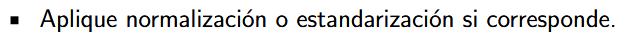

No sé si corresponde, pero anteriormente la estandarizacion de los datos fue util a la hora de clasificar, por lo que voy a probar estandarizando.

cambia algo si hacemos primero estandarizacion y despues normalizacion o viceversa ? Me suena que si, porque el metodo segundo alteraria el primero.

Apliqué estandarizacion en la celda anterior por comodidad. Estandarizé porque hay muchas variables numéricas continuas con medias y desvíos muy distintos(ie. elevation tiene valor maximo 3686, mientras que slope 66). Si no estandarizara, este rango desigual afecta directamente a muchos algoritmos.

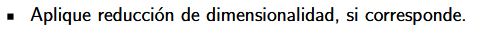

Reducir la dimensionalidad podria darnos cierta ventaja, como reducir el computo, eliminar variables irrelevantes reduciendo ruido, etc... capaz hay relacion entre variables.

A continuacion veo la matriz de correlacion entre las caracteristicas del dataset:

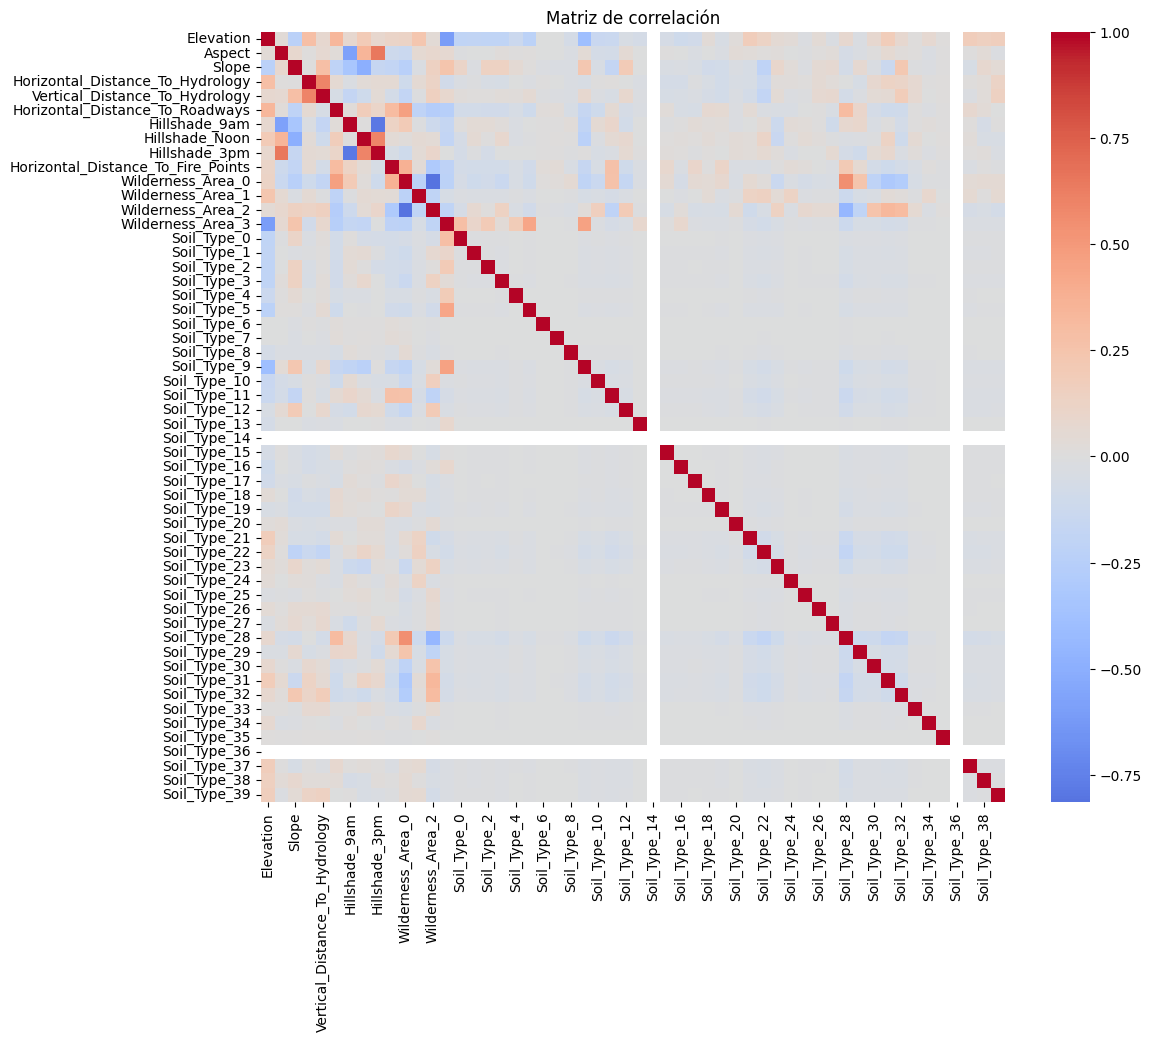

In [ ]:
corr_matrix = X.corr()

# Visualizar con un mapa de calor si quieres ver patrones fácilmente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

Como observamos, las caracteristicas no estan muy relacionadas entre si, incluso diria estan cerca de ser independientes.

Como no hay relacion entre las variables no voy a aplicar reduccion de dimensionalidad ya que toda variable puede ser muy util.

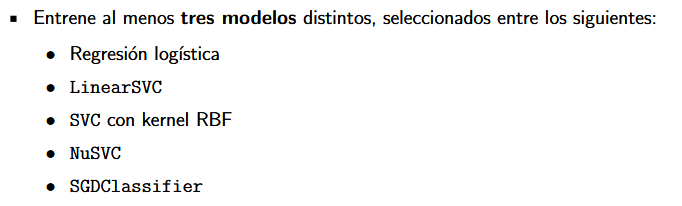

Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, cohen_kappa_score

clf = LogisticRegression(max_iter=1000)  # aumentar max_iter si no converge
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("F1-score:\n", f1_score(y_test, y_pred))
print("Kappa de cohen:\n", cohen_kappa_score(y_test, y_pred))

Accuracy: 0.7659024257699407
Matriz de confusión:
 [[36723 13345]
 [11640 45021]]
F1-score:
 0.7827901275352743
Kappa de cohen:
 0.5290784044711629


Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, max_iter=10000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("F1-score:\n", f1_score(y_test, y_pred))
print("Kappa de cohen:\n", cohen_kappa_score(y_test, y_pred))

Accuracy: 0.7647499742338071
Matriz de confusión:
 [[36558 13510]
 [11598 45063]]
F1-score:
 0.7821129180623774
Kappa de cohen:
 0.5266459948188229


SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.001, loss='log_loss', penalty='l1')  # aproximación de SVM lineal

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("F1-score:\n", f1_score(y_test, y_pred))
print("Kappa de cohen:\n", cohen_kappa_score(y_test, y_pred))

Accuracy: 0.7670642468307582
Matriz de confusión:
 [[36826 13242]
 [11619 45042]]
F1-score:
 0.7837139501500717
Kappa de cohen:
 0.5314603111054161


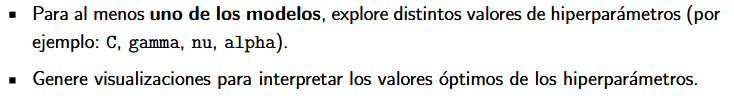

Voy a buscar el hiperparametro alpha optimo para SGDClassifier.

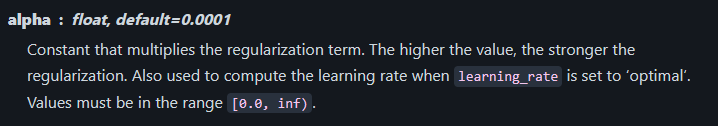

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

grid = GridSearchCV(
    SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,53.262567,3.093448,0.032857,0.007255,0.000001,{'alpha': 1e-06},0.749529,0.730274,0.734795,0.745216,0.735893,0.739141,0.007111,5
1,16.905035,0.819120,0.028013,0.006737,0.000010,{'alpha': 1e-05},0.755443,0.765152,0.756052,0.763322,0.749865,0.757967,0.005585,4
2,6.074405,1.186988,0.023396,0.000667,0.000100,{'alpha': 0.0001},0.767085,0.767436,0.762974,0.768839,0.767141,0.766695,0.001967,3
3,3.317902,0.508260,0.032855,0.013619,0.001000,{'alpha': 0.001},0.771524,0.770364,0.769170,0.769963,0.769518,0.770108,0.000815,1
4,2.072911,0.022564,0.025726,0.004002,0.010000,{'alpha': 0.01},0.768596,0.768479,0.767448,0.767761,0.768066,0.768070,0.000430,2
5,2.495445,0.524361,0.025020,0.003694,0.100000,{'alpha': 0.1},0.689681,0.692128,0.689798,0.692160,0.690052,0.690764,0.001134,6


Vemos que el mejor modelo fue el que tiene parametro alpha=0.001. Cuando digo "el mejor modelo" es mas bien el que se eligio de acuerdo a la metrica indicada en scoring, en este caso use accuracy pero bien podria haber usado otra metrica.

a continuacion pruebo gridsearch con otros hiperparametros a ver que tal (funciones de perdida y penalty).

In [ ]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2],
}
grid = GridSearchCV(
    SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.934166,1.581404,0.026020,0.002846,0.0001,hinge,l2,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.767085,0.767436,0.762974,0.768839,0.767141,0.766695,0.001967,8
1,29.785250,11.542376,0.026392,0.003430,0.0001,hinge,l1,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.770657,0.767846,0.769275,0.771322,0.769729,0.769766,0.001195,3
2,7.802565,0.476266,0.032389,0.009312,0.0001,hinge,elasticnet,"{'alpha': 0.0001, 'loss': 'hinge', 'penalty': ...",0.765305,0.767635,0.766019,0.767597,0.765232,0.766358,0.001064,10
3,4.903958,0.650128,0.027447,0.005605,0.0001,log_loss,l2,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.763314,0.768151,0.766230,0.763650,0.763920,0.765053,0.001858,18
4,37.223829,4.777723,0.031118,0.010457,0.0001,log_loss,l1,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.766382,0.763782,0.763571,0.762585,0.765876,0.764439,0.001447,19
5,6.219458,1.265592,0.025238,0.003800,0.0001,log_loss,elasticnet,"{'alpha': 0.0001, 'loss': 'log_loss', 'penalty...",0.758395,0.757762,0.759226,0.757209,0.755686,0.757656,0.001192,25
6,19.472187,2.313397,0.042106,0.024799,0.0001,modified_huber,l2,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.750641,0.760749,0.755209,0.753004,0.757361,0.755393,0.003489,27
7,156.505145,107.877989,0.023755,0.001675,0.0001,modified_huber,l1,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.761182,0.762693,0.764567,0.764330,0.766239,0.763802,0.001726,20
8,16.147135,1.469490,0.026559,0.007823,0.0001,modified_huber,elasticnet,"{'alpha': 0.0001, 'loss': 'modified_huber', 'p...",0.760268,0.752410,0.767202,0.763416,0.744454,0.757550,0.008159,26
9,3.059269,0.369993,0.023476,0.000692,0.0010,hinge,l2,"{'alpha': 0.001, 'loss': 'hinge', 'penalty': '...",0.771524,0.770364,0.769170,0.769963,0.769518,0.770108,0.000815,2


In [ ]:
grid.best_params_

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

Vemos que el mejor modelo tiene: {'alpha': 0.001, 'loss': 'hinge','penalty':'l1'}

A continuacion grafico los resultados del grid search.


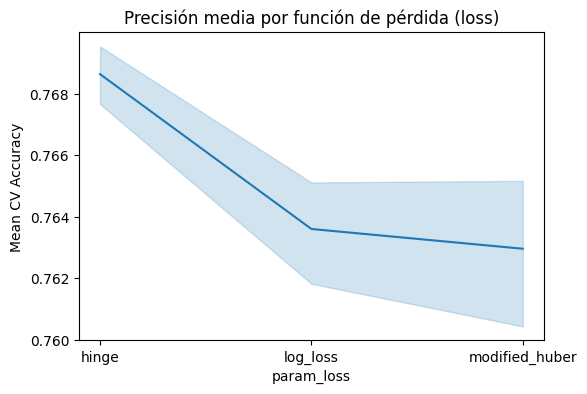

In [ ]:
results = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(6,4))
sns.lineplot(x='param_loss', y='mean_test_score', data=results)
plt.title('Precisión media por función de pérdida (loss)')
plt.ylabel('Mean CV Accuracy')
plt.show()

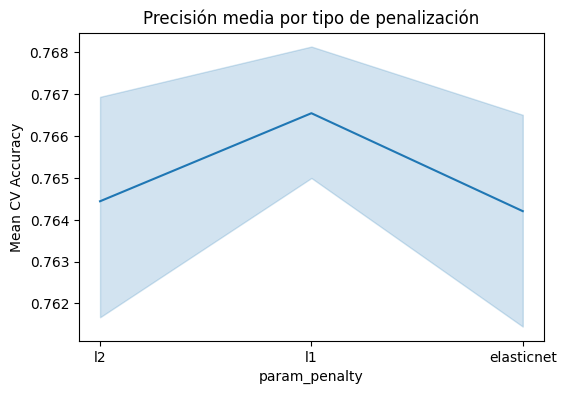

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x='param_penalty', y='mean_test_score', data=results)
plt.title('Precisión media por tipo de penalización')
plt.ylabel('Mean CV Accuracy')
plt.show()

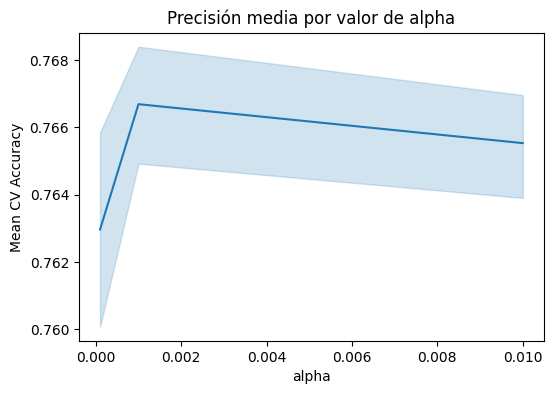

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(x='param_alpha', y='mean_test_score', data=results)
plt.title('Precisión media por valor de alpha')
plt.ylabel('Mean CV Accuracy')
plt.xlabel('alpha')
plt.show()

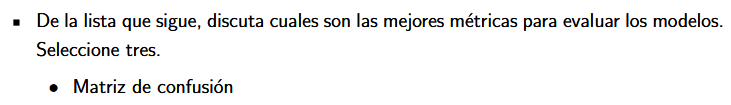
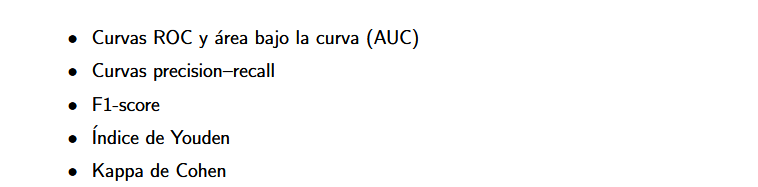

La matriz de confusion es una buena metrica, ya que nos dice la cantidad de aciertos y la cantidad de veces que no acerto para cada clase. Esto sirve ya que nos damos una idea de que tan bien predice cada una de las clases por separado. Nos brinda la informacion 'base' necesaria para calcular muchas otras metricas a partir de la TP,FP,TN,FN.

Para la curva ROC necesita modelos que devuelva un score o probabilidad, y los que estoy usando devuelven directamente la clasificacion de cada clase. Regrsion logistica si tiene modelo.predict_proba que devuelve la probabilidad de un ejemplo de pertenecer a la clase. En dicho caso el area bajo la curva puede ser buena metrica.

F1-score es la media armonica entre la precision y el recall.
Precisión: De todos los que el modelo dijo que eran positivos, cuántos lo eran realmente. Recall: De todos los que realmente eran positivos, cuántos los detectó el modelo. Entonces nos dice que tan bien les va a estas dos metricas. Esto es de bastante utilidad, es mucho más fácil comparar F1 scores que comparar múltiples matrices de confusion.

Curva precision-recall: similar a la explicacion con ROC (revisar)

Indice de youden: recall+especificidad-1
Es muy útil para elegir el mejor umbral de decisión para un clasificador probabilístico (como regresión logística). No es util a la hora de comparar modelos (revisar el porque). Podria usarlo con ROC o PRC.

Kappa de cohen: Calcula el "agreement beyond randomness" entre los valores predichos y los valores reales; La metrica da un valor que nos dice en que medida los valores predichos por el modelo no fueron por pura suerte. Por ejemplo, un modelo podria predecir siempre 1, y podria irle bien sobre el dataset por pura suerte, luego el valor de la metrica seria bajo porque no hubo mucho "acuerdo real" entre los valores predichos y reales. Me parece una metrica interesante y que podria servir. Capaz esta metrica puede dar señales de sobreajuste de datos: si se compara los resultados sobre train y test, y en test da mas bajito.

Voy a usar matriz de confusion, f1-score, y kappa de cohen. No voy a usar ROC y PRC con AUC ni el indice de youden porque seria unicamente con regresion logistica (aunque me suena capaz se puede con los otros modelos midiendo alguna distancia, no lo hago porque no estoy seguro como).  




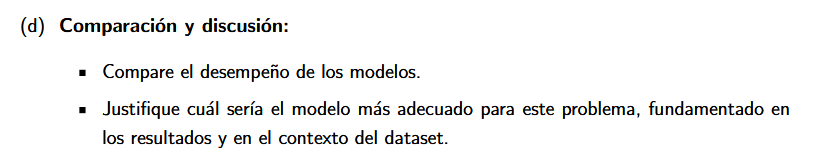

### Regresion Logistica

Accuracy: 0.7659024257699407

Matriz de confusión:

 [[36723 13345]

 [11640 45021]]

F1-score:
 0.7827901275352743

Kappa de cohen:
 0.5290784044711629


### LinearSVC

Accuracy: 0.7647499742338071

Matriz de confusión:

 [[36558 13510]

 [11598 45063]]

F1-score:
 0.7821129180623774

Kappa de cohen:
 0.5266459948188229

### SGDClassifier

Accuracy: 0.7670642468307582

Matriz de confusión:

 [[36826 13242]

 [11619 45042]]

F1-score:
 0.7837139501500717

Kappa de cohen:
 0.5314603111054161

Todos los modelos tienen un F1-Score aproximadamente alto, alrededor de 0.78. Osea que en todos hay un buen equilibrio entre precision y recall. El mas alto lo tiene la SGDClassifier, por muy poquito.

SGDClassifier tambien obtiene el mejor valor de kappa de cohen, con 0.53, indicando un mayor nivel de acuerdo entre predicciones mas alla del azar. Los otros clasificadores obtienen un valor muy cercano aprox 0.52.

Todo se ve reflejado tambien en la matriz de confusion, donde todos los modelos tienen aprox la misma cantidad de TP, TN, FP, FN. SGDClassifier tuvo un poco mas de TP's que los demas.

Todo pareciera indicar que SGDClassifier es la mas adecuada para este tipo de problema, pero todos los modelos estuvieron muy similares, es decir a cualquiera le hiria similar.

Las ventajas de SGDClassifier sobre este conjunto de datos es que al ser modelo lineal es mas facil de entrenar, sobretodo porque tenemos muchisimos datos y caracteristicas, ademas tenemos regularizacion que ayuda a evitar overfitting.